# Modeling and Simulation in Python

Chapter 3: Explain

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [97]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

Pandas is a module that provides tools for reading and processing data.  The `read_html` reads a web page from a file or the Internet and creates one DataFrame for each table on the page.

In [98]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

In [99]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

`tables` is a sequence of DataFrame objects.  We can select the DataFrame we want using the bracket operator.  The tables are numbered from 0, so `table2` is actually the third table on the page.

`head` selects the header and the first five rows.

In [100]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2007)[15],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`tail` selects the last five rows.

In [101]:
table2.tail()

,United States Census Bureau (2015)[18],Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2007)[15],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,,
2011,6944055583,6.986951e+09,6997998760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,7022349283,7.057075e+09,7080072417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7101027895,7.136796e+09,7162119434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7178722893,7.238184e+09,7243784000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7256490011,7.336435e+09,7349472000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [102]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

In [103]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2525149000,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2572850917,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2619292068,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2665865392,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2713172027,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [104]:
census = table2.census
census.head()

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
Name: census, dtype: int64

In [105]:
census.tail()

Year
2011    6944055583
2012    7022349283
2013    7101027895
2014    7178722893
2015    7256490011
Name: census, dtype: int64

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

The following function plots the estimates generated by the US Censis and UN DESA, and labels the axes.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

In [106]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    un = table.un / 1e9
    census = table.census / 1e9
    
    plot(census, ':', color='darkblue', label='US Census')
    plot(un, '--', color='green', label='UN DESA')
    
    decorate(xlabel='Year',
             ylabel='World population (billion)')

Now we can plot the estimates.

Saving figure to file chap03-fig01.pdf


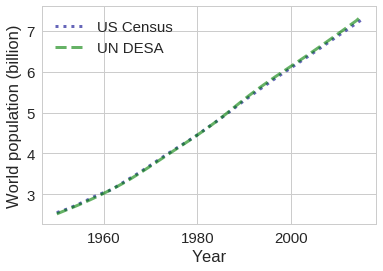

In [107]:
newfig()
plot_estimates(table2)
savefig('chap03-fig01.pdf')

From here on, we will work in units of billions.

In [108]:
un = table2.un / 1e9

In [109]:
census = table2.census / 1e9

This expression computes the elementwise differences between the series, then divides through by the UN value to produce relative errors, then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [110]:
max(abs(census - un) / un) * 100

1.2862470293832287

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

1.  Compute the elementwise differences, `census - un`
2.  Compute the absolute differences, `abs(census - un)`
3.  Compute the relative differences, `abs(census - un) / un`
4.  Compute the percent differences, `abs(census - un) / un * 100`


In [111]:
# Solution

census - un

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
1955    0.020448
1956    0.023728
1957    0.028307
1958    0.032107
1959    0.030321
1960    0.016999
1961    0.001137
1962   -0.000978
1963    0.008650
1964    0.017462
1965    0.021303
1966    0.023203
1967    0.021812
1968    0.020639
1969    0.021050
1970    0.021525
1971    0.023573
1972    0.023695
1973    0.022914
1974    0.021304
1975    0.018063
1976    0.014049
1977    0.011268
1978    0.008441
1979    0.007486
          ...   
1986   -0.012805
1987   -0.018115
1988   -0.023658
1989   -0.028560
1990   -0.031861
1991   -0.037323
1992   -0.038763
1993   -0.040597
1994   -0.042404
1995   -0.042619
1996   -0.041576
1997   -0.040716
1998   -0.040090
1999   -0.039403
2000   -0.039129
2001   -0.038928
2002   -0.038837
2003   -0.039401
2004   -0.040006
2005   -0.041050
2006   -0.041964
2007   -0.043192
2008   -0.044599
2009   -0.046508
2010   -0.049851
2011   -0.053943
2012   -0.057723
2013   -0

In [112]:
# Solution

abs(census - un)

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
1955    0.020448
1956    0.023728
1957    0.028307
1958    0.032107
1959    0.030321
1960    0.016999
1961    0.001137
1962    0.000978
1963    0.008650
1964    0.017462
1965    0.021303
1966    0.023203
1967    0.021812
1968    0.020639
1969    0.021050
1970    0.021525
1971    0.023573
1972    0.023695
1973    0.022914
1974    0.021304
1975    0.018063
1976    0.014049
1977    0.011268
1978    0.008441
1979    0.007486
          ...   
1986    0.012805
1987    0.018115
1988    0.023658
1989    0.028560
1990    0.031861
1991    0.037323
1992    0.038763
1993    0.040597
1994    0.042404
1995    0.042619
1996    0.041576
1997    0.040716
1998    0.040090
1999    0.039403
2000    0.039129
2001    0.038928
2002    0.038837
2003    0.039401
2004    0.040006
2005    0.041050
2006    0.041964
2007    0.043192
2008    0.044599
2009    0.046508
2010    0.049851
2011    0.053943
2012    0.057723
2013    0

In [113]:
# Solution

abs(census - un) / un

Year
1950    0.012862
1951    0.008585
1952    0.006674
1953    0.006072
1954    0.006286
1955    0.007404
1956    0.008439
1957    0.009887
1958    0.011011
1959    0.010208
1960    0.005617
1961    0.000369
1962    0.000311
1963    0.002702
1964    0.005350
1965    0.006399
1966    0.006829
1967    0.006289
1968    0.005827
1969    0.005821
1970    0.005832
1971    0.006258
1972    0.006166
1973    0.005847
1974    0.005332
1975    0.004437
1976    0.003388
1977    0.002670
1978    0.001965
1979    0.001712
          ...   
1986    0.002585
1987    0.003591
1988    0.004604
1989    0.005461
1990    0.005988
1991    0.006900
1992    0.007054
1993    0.007277
1994    0.007490
1995    0.007423
1996    0.007142
1997    0.006903
1998    0.006709
1999    0.006511
2000    0.006386
2001    0.006274
2002    0.006183
2003    0.006197
2004    0.006216
2005    0.006302
2006    0.006365
2007    0.006473
2008    0.006604
2009    0.006805
2010    0.007208
2011    0.007708
2012    0.008153
2013    0

In [114]:
# Solution

max(abs(census - un) / census) * 100

1.2813631502151765

### Constant growth

We can select a value from a `Series` using bracket notation.  Here's the first element:

In [115]:
census[1950]

2.5576286540000002

And the last value.

In [116]:
census[2015]

7.2564900110000004

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [117]:
first_year = get_first_label(census)
last_year = get_last_label(census)
first_year, last_year

(1950, 2015)

And use them to look up the first and last values.

In [118]:
census[first_year], census[last_year] 

(2.5576286540000002, 7.2564900110000004)

Then we can compute the average annual growth in billions of people per year.

In [119]:
total_growth = census[last_year] - census[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / elapsed_time
annual_growth

0.07229017472307693

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.  A `TimeSeries` is almost identical to a `Series`; I am giving it a different name mostly to help us keep track of how it's being used.

In [120]:
results = TimeSeries()

Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [121]:
results[first_year] = census[first_year]
results

,value
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [122]:
for t in linrange(first_year, last_year-1):
    results[t+1] = results[t] + annual_growth

`linrange` is defined in the `modsim` library.  It is similar to `linspace`, but instead of taking parameters `start`, `stop`, and `num`, it takes `start`, `stop`, and `step`.

In [124]:
help(linrange)

Help on function linrange in module modsim:

linrange(start=0, stop=None, step=1, **kwargs)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    By default, the last value in the array is `stop` (at least approximately).
    If you provide the keyword argument `endpoint=False`, the last value
    in the array is `stop-step`. 
    
    start: first value
    stop: last value
    step: space between values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



Here's what the results looks like, compared to the actual data.

Saving figure to file chap03-fig02.pdf


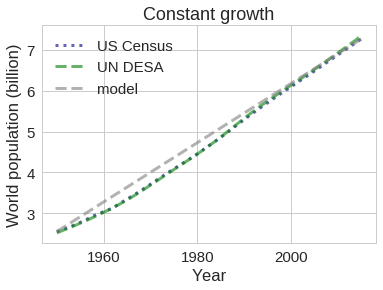

In [123]:
newfig()
plot_estimates(table2)
plot(results, '--', color='gray', label='model')
decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
savefig('chap03-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

**Exercise:**  Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

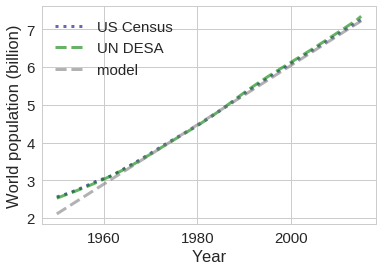

In [125]:
# Solution

# fit the model using data from 1970 on
first_year = 1970
last_year = get_last_label(census)
total_growth = census[last_year] - census[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / elapsed_time

# run the simulation
# subtracting 0.45 from the initial value shifts the
# fitted curve down, so it fits the data better
results = TimeSeries()
first_year = 1950
results[first_year] = census[first_year] - 0.45
for t in linrange(first_year, last_year-1):
    results[t+1] = results[t] + annual_growth
    
# plot the results
newfig()
plot_estimates(table2)
plot(results, '--', color='gray', label='model')
decorate(xlabel='Year', ylabel='World population (billion)')

### Now with system objects

We can rewrite the code from the previous section using system objects.

In [34]:
first_year = get_first_label(census)
last_year = get_last_label(census)
total_growth = census[last_year] - census[first_year]
elapsed_time = last_year - first_year
annual_growth = total_growth / elapsed_time

Here's the system object.

In [35]:
system = System(t0 = first_year, 
                t_end = last_year,
                p0 = census[first_year],
                annual_growth = annual_growth)

And we can encapsulate the code tha runs the model in a function that stores the resulting Series as a new system variable.

In [36]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.t_end-1):
        results[t+1] = results[t] + system.annual_growth
    
    system.results = results

We can also encapsulate the code that plots the results.

In [37]:
def plot_results(system, title):
    """Plot the estimates and the model.
    
    system: System object with `results`
    title: string
    """
    newfig()
    plot_estimates(table2)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

Here's how we run it.

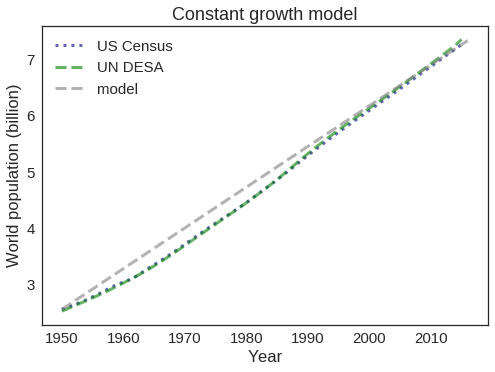

In [38]:
run_simulation1(system)
plot_results(system, 'Constant growth model')

**Exercise:** The constant growth model doesn't make a lot of sense, because it seems like the number of deaths and births should depend on the size of the population.  As a small improvement, let's write a version of `run_simulation1` where the number of deaths is proportional to the size of the population, but the number of births is constant.  This model doesn't make a lot of sense, either, but it's a good exercise.

Write a function called `run_simulation1b` that implements a model where the number of births is constant, but the number of deaths is proportional to the current size of the population.  Set the death rate to `0.01`, which means that 1% of the population dies each year; then choose the number of annual births to make the model fit the data as well as you can.

Hint: It probably won't fit very well.

In [39]:
# Solution

def run_simulation1b(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.t_end-1):
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + system.annual_births - deaths
        
    system.results = results

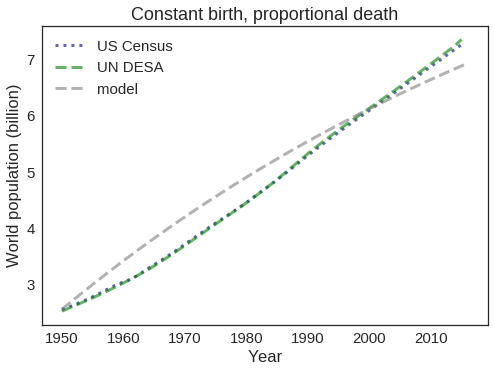

In [40]:
# Solution

system.death_rate = 0.01
system.annual_births = annual_growth * 1.6

run_simulation1b(system)
plot_results(system, 'Constant birth, proportional death')

## Proportional death, proportional birth

Now let's get to a more realistic model where the number of births and deaths is proportional to the current population.

In [41]:
def run_simulation2(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: system object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.t_end-1):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    system.results = results

I kept the death rate at 1% and chose the birth rate to fit the data.

In [42]:
system.death_rate = 0.01
system.birth_rate = 0.027

Here's what it looks like.

Saving figure to file chap03-fig03.pdf


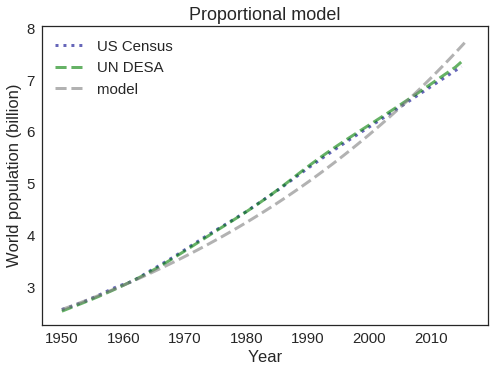

In [43]:
run_simulation2(system)
plot_results(system, 'Proportional model')
savefig('chap03-fig03.pdf')

The model fits the data pretty well for the first 20 years, but not so well after that.

**Exercise:** In this implementation, we compute the number of deaths and births separately, but since they are both proportional to the current population, we can combine them.

Write a function called `run_simulation2b` that implements a model with a single parameter, `alpha`, that represents the net growth rate, which is the difference between the birth and death rates.  For example, if `alpha=0.01`, the population should grow by 1% per year.

Choose the value of `alpha` that fits the data best.

In [44]:
# Solution

def run_simulation2b(system):
    """Runs the constant growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.t_end-1):
        net_growth = system.alpha * results[t]
        results[t+1] = results[t] + net_growth
        
    system.results = results

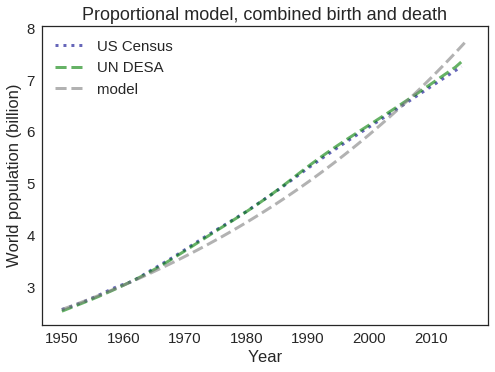

In [45]:
# Solution

system.alpha = 0.017

run_simulation2b(system)
plot_results(system, 'Proportional model, combined birth and death')

### Factoring out the update function

The functions that run the model all look the same except the body of the loop.  So we can factor that part out into a function.

In [46]:
def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

Now the name `update_func` refers to a function object.

In [47]:
update_func

<function __main__.update_func>

Which we can confirm by checking its type.

In [48]:
type(update_func)

function

`run_simulation` takes the update function as a parameter and calls it just like any other function.

In [49]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    system.results = results

Here's how we use it.

In [50]:
run_simulation(system, update_func)

Remember not to put parentheses after `update_func`.  What happens if you try?

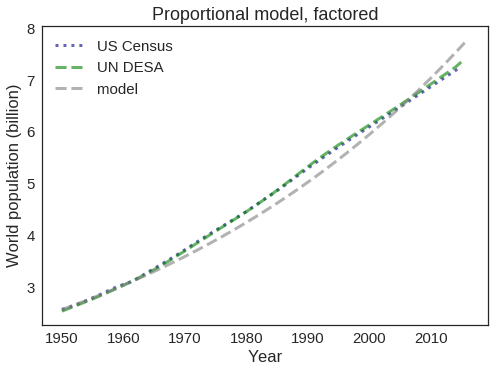

In [51]:
plot_results(system, 'Proportional model, factored')

**Exercise:** When you run `run_simulation`, it runs `update_func` once for each year between `t0` and `t_end`.  To see that for yourself, add a print statement at the beginning of `update_func` that prints the values of `t` and `pop`, then run `run_simulation` again.

### Combining birth and death

Since births and deaths get added up, we don't have to compute them separately.  We can combine the birth and death rates into a single net growth rate.

In [52]:
def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

Here's how it works:

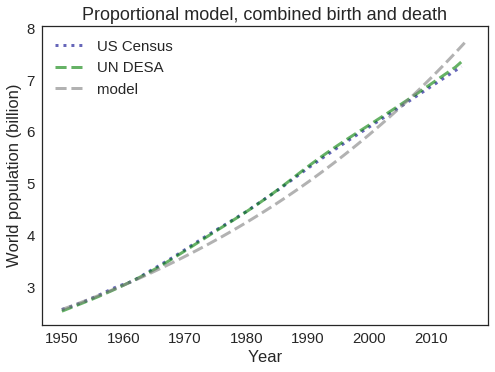

In [53]:
system.alpha = system.birth_rate - system.death_rate

run_simulation(system, update_func)
plot_results(system, 'Proportional model, combined birth and death')

Notice that we have two versions of `update_func` now, defined in different cells (and we'll have a few more version soon).  Remember: when you redefine a function, the new definition replaces the old one.  So you have to keep track of which definition is currently in effect.  If you lose track, you can execute the cell you want again.  
If you really lose track, consider running "Restart & Run All" from the "Kernel" menu, which clear out all variables and functions, and re-runs all cells in the notebook, in order.

**Exercise:** Maybe the reason the proportional model doesn't work very well is that the growth rate, `alpha`, might be changing over time.  So let's try a model with different growth rates before and after 1980 (as an arbitrary choice).

Write a version of `update_func` that takes `pop`, `t`, and `system` as parameters.  The system object, `system`, should contains two parameters: the growth rate before 1980, `alpha1`, and the growth rate after 1980, `alpha2`.  It should compute and return the simulated population one year later.

Note: Don't forget the `return` statement.

In [54]:
# Solution

def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1980:
        net_growth = system.alpha1 * pop
    else:
        net_growth = system.alpha2 * pop
    return pop + net_growth

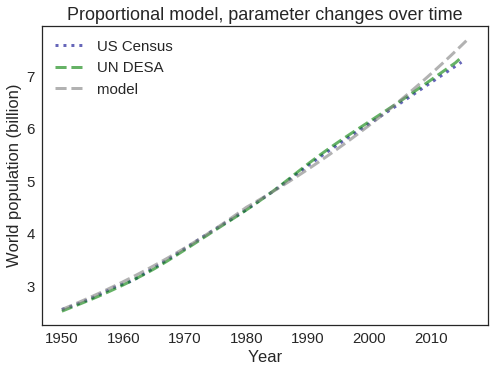

In [55]:
# Solution

system.alpha1 = 0.019
system.alpha2 = 0.015

run_simulation(system, update_func)
plot_results(system, 'Proportional model, parameter changes over time')

### Quadratic growth

Here's the implementation of the quadratic growth model.

In [56]:
def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

And here are the results.  Can you find values for the parameters that make the model fit better?

Saving figure to file chap03-fig04.pdf


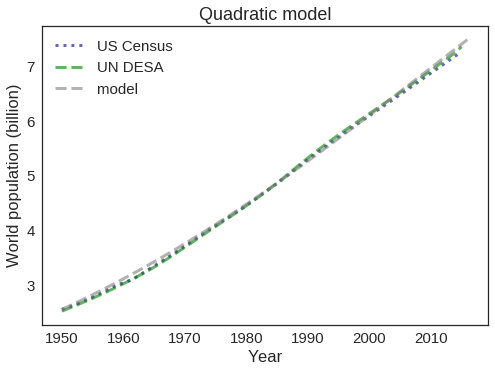

In [57]:
system.alpha = 0.025
system.beta = -0.0018

run_simulation(system, update_func)
plot_results(system, 'Quadratic model')
savefig('chap03-fig04.pdf')

To understand the quadratic model better, let's plot net growth as a function of population.

In [58]:
pop_array = linspace(0.001, 15, 100)
net_growth_array = system.alpha * pop_array + system.beta * pop_array**2

Here's what it looks like:

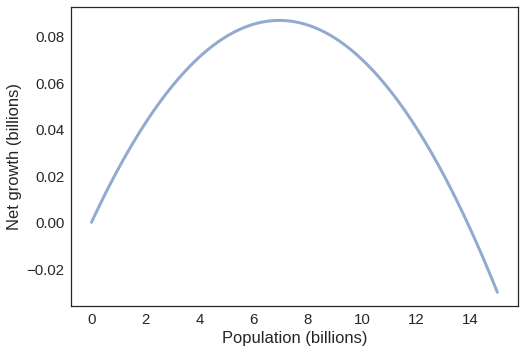

In [59]:
newfig()
plot(pop_array, net_growth_array, '-')
decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)')

To make this graph easier to read, I want to add a grid.

The Seaborn module provides `sns.set`, which sets the style for the plots:

In [60]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
    Set aesthetic parameters in one step.
    
    Each set of parameters can be set directly or temporarily, see the
    referenced functions below for more information.
    
    Parameters
    ----------
    context : string or dict
        Plotting context parameters, see :func:`plotting_context`
    style : string or dict
        Axes style parameters, see :func:`axes_style`
    palette : string or sequence
        Color palette, see :func:`color_palette`
    font : string
        Font family, see matplotlib font manager.
    font_scale : float, optional
        Separate scaling factor to independently scale the size of the
        font elements.
    color_codes : bool
        If ``True`` and ``palette`` is a seaborn palette, remap the shorthand
        color codes (e.g. "b", "g", "r", etc.) to the colors from this pal

Here's what it looks like.  Remember that the x axis is population now, not time.

Saving figure to file chap03-fig05.pdf


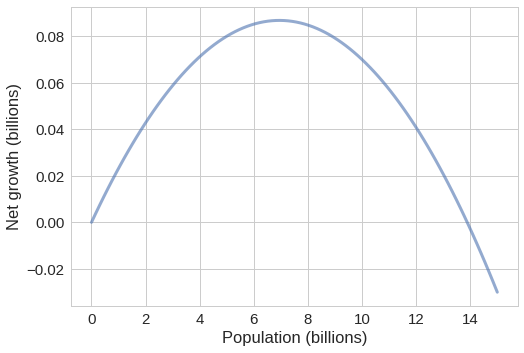

In [61]:
newfig()
sns.set(style='whitegrid', font_scale=1.5)
plot(pop_array, net_growth_array, '-')
decorate(xlabel='Population (billions)',
         ylabel='Net growth (billions)',
         legend=False)
savefig('chap03-fig05.pdf')

It looks like the growth rate passes through 0 when the population is a little less than 14 billion.

In the book we found that the net growth is 0 when the population is $-\alpha/\beta$:

In [62]:
-system.alpha / system.beta

13.88888888888889

This is the equilibrium the population tends toward.

**Exercise:** In the book, I presented a different way to parameterize the quadratic model:

$ \Delta p = r p (1 - p / K) $

where $r=\alpha$ and $K=-\alpha/\beta$.  Write a version of `update_func` that implements this version of the model.  Test it by computing system variables `r` and `K` equivalent to `alpha` and `beta`, and confirm that you get the same results. 

In [63]:
# Solution

system.r = system.alpha
system.K = -system.alpha/system.beta

system.r, system.K

(0.025, 13.88888888888889)

In [64]:
# Solution

def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.r * pop * (1 - pop / system.K)
    return pop + net_growth

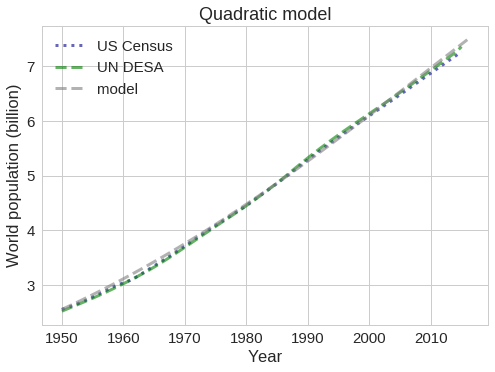

In [65]:
# Solution

run_simulation(system, update_func)
plot_results(system, 'Quadratic model')

**Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

Select `table1`, which is the second table on the page.

In [66]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[15],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [67]:
table1.tail()

,Population Reference Bureau (1973–2015)[6],United Nations Department of Economic and Social Affairs (2015)[7],Maddison (2008)[8],HYDE (2010)[citation needed],Tanton (1994)[9],Biraben (1980)[10],McEvedy & Jones (1978)[11],Thomlinson (1975)[12],Durand (1974)[13],Clark (1967)[14]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Some of the estimates are in a form we can't read as numbers.  We could clean them up by hand, but for simplicity I'll replace any value that has an `M` in it with `NaN`.

In [68]:
table1.replace('M', np.nan, regex=True, inplace=True)

Again, we'll replace the long column names with more convenient abbreviations.

In [69]:
table1.columns = ['prb', 'un', 'maddison', 'hyde', 'tanton', 
                  'biraben', 'mj', 'thomlinson', 'durand', 'clark']

This function plots selected estimates.

In [70]:
def plot_prehistory(table):
    """Plots population estimates.
    
    table: DataFrame
    """
    plot(table.prb, 'ro', label='PRB')
    plot(table.un, 'co', label='UN')
    plot(table.hyde, 'yo', label='HYDE')
    plot(table.tanton, 'go', label='Tanton')
    plot(table.biraben, 'bo', label='Biraben')
    plot(table.mj, 'mo', label='McEvedy & Jones')

Here are the results.  Notice that we are working in millions now, not billions.

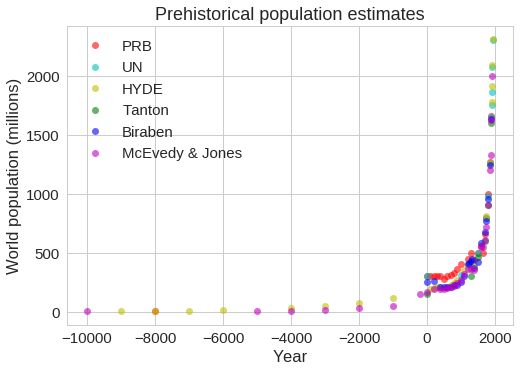

In [71]:
newfig()
plot_prehistory(table1)
decorate(xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistorical population estimates')

We can use `xlim` to zoom in on everything after Year 0.

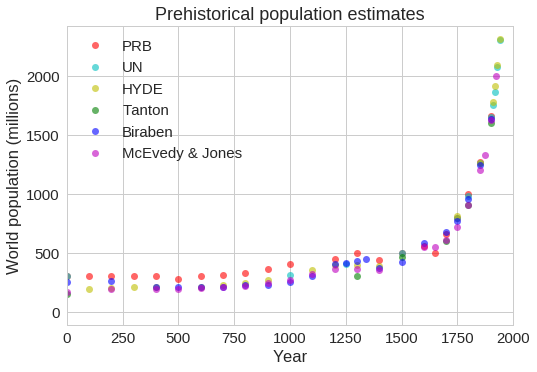

In [72]:
newfig()
plot_prehistory(table1)
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistorical population estimates')

See if you can find a model that fits these data well from Year -1000 to 1940, or from Year 0 to 1940.

How well does your best model predict actual population growth from 1950 to the present?

In [73]:
# Solution

def update_func(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth


p0 = table1.biraben[1]

prehistory = System(t0=1, 
                    t_end=2016,
                    p0=p0,
                    alpha=0.0011)

run_simulation(prehistory, update_func)

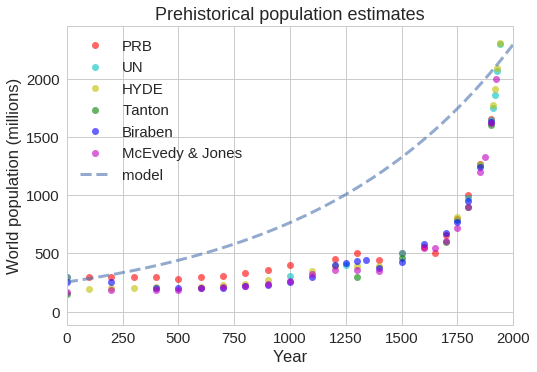

In [74]:
# Solution

newfig()
plot_prehistory(table1)
plot(prehistory.results, '--', label='model')
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistorical population estimates')

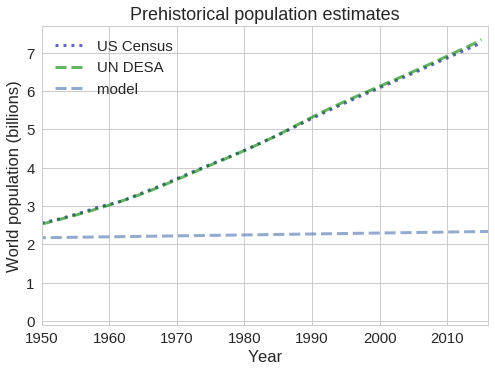

In [75]:
# Solution

newfig()
plot_estimates(table2)
plot(prehistory.results / 1000, '--', label='model')
decorate(xlim=[1950, 2016], xlabel='Year', 
         ylabel='World population (billions)',
         title='Prehistorical population estimates')

### Disfunctions

When people first learn about functions, there are a few things they often find confusing.  In this section I present and explain some common problems with functions.

As an example, suppose you want a function that takes a `System` object, with variables `alpha` and `beta`, as a parameter and computes the carrying capacity, `-alpha/beta`.  Here's a good solution:

In [76]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.8888888889


Now let's see all the ways that can go wrong.

**Disfunction #1:** Not using parameters.  In the following version, the function doesn't take any parameters; when `system` appears inside the function, it refers to the object we created outside the function.


In [77]:
def carrying_capacity():
    K = -system.alpha / system.beta
    return K
    
system = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity()
print(pop)

13.8888888889


This version actually works, but it is not as versatile as it could be.  If there are several `System` objects, this function can only work with one of them, and only if it is named `system`.

**Disfunction #2:** Clobbering the parameters.  When people first learn about parameters, they often write functions like this:

In [78]:
def carrying_capacity(system):
    system = System(alpha=0.025, beta=-0.0018)
    K = -system.alpha / system.beta
    return K
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

13.8888888889


In this example, we have a `System` object named `sys1` that gets passed as an argument to `carrying_capacity`.  But when the function runs, it ignores the argument and immediately replaces it with a new `System` object.  As a result, this function always returns the same value, no matter what argument is passed.

When you write a function, you generally don't know what the values of the parameters will be.  Your job is to write a function that works for any valid values.  If you assign your own values to the parameters, you defeat the whole purpose of functions.


**Disfunction #3:** No return value.  Here's a version that computes the value of `K` but doesn't return it.

In [79]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)

None


A function that doesn't have a return statement always returns a special value called `None`, so in this example the value of `pop` is `None`.  If you are debugging a program and find that the value of a variable is `None` when it shouldn't be, a function without a return statement is a likely cause.

**Disfunction #4:** Ignoring the return value.  Finally, here's a version where the function is correct, but the way it's used is not.

In [80]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K
    
sys2 = System(alpha=0.025, beta=-0.0018)
carrying_capacity(sys2)
print(K)

NameError: name 'K' is not defined

In this example, `carrying_capacity` runs and returns `K`, but the return value is dropped.

When you call a function that returns a value, you should do something with the result.  Often you assign it to a variable, as in the previous examples, but you can also use it as part of an expression.

For example, you could eliminate the temporary variable `pop` like this:

In [ ]:
print(carrying_capacity(sys1))

Or if you had more than one system, you could compute the total carrying capacity like this:


In [ ]:
total = carrying_capacity(sys1) + carrying_capacity(sys2)
total